Marcus Frischherz, Matrikelnummer 08225094
# 280413-1 Astronomische Instrumente
## Übung 2

### Transmission, Emission 1

Wir entnehmen dem Diagramm, dass by 877 $\mu m$, 4 mm pwv und 2400 m Seehöhe die Transmission T=0.6 (60%) beträgt.
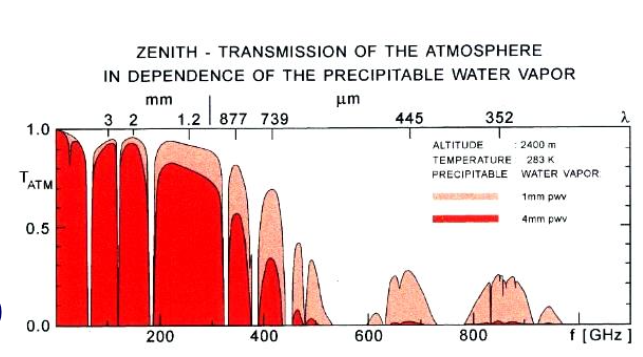

Lufmasse $X\,=\,\frac{1}{\cos z}\,=\,\frac{1}{\cos 45^\circ}\,=\, \sqrt{2}\,\approx\,1.41$
Gemessene Intensität $I\,=\,I_\circ\cdot e^{-\tau \cdot X}$. 

Wir lösen nach $\tau$ auf im Zenith, wo X = 1 => $\tau\,=\,-\,ln\,T$

In [1]:
import numpy as np

alpha = 45
z = alpha/360*2*np.pi
X = 1/np.cos(z)
X_better = 1/np.cos(z)*(1-0.0012*(1/(np.cos(z)**2)-1))
X_much_better = (1.003198*np.cos(z) + 0.101632) / ((np.cos(z))**2 + 0.09056*np.cos(z) + 0.003198)
print("X = ",f'{X:5.3f}'," genauer X = ",f'{X_better:5.3f}'," sphärisch X = ",f'{X_much_better:5.3f}')

T = .6
I_0 = 10000

tau = -np.log(T)

I = I_0*np.exp(-tau*X)

print("tau = ",f'{tau:4.2f}',"I = ",f'{I:4.0f}')


X =  1.414  genauer X =  1.413  sphärisch X =  1.430
tau =  0.51 I =  4856


<ins>Erwartet werden ~ 4856 ADU</ins>

### Transmission, Emission 2
Das Wiensche Verschiebungsgesetz lautet: $\lambda_{max}\,=\,2897.8\,\mu m \cdot \frac{1}{T/K}$. Die typische Temperatur der Athmosphäre beträgt 270 K. Das Maximum wird daher erwartet bei

In [2]:
T=270
lam = 2897.8*(1/T)

print("lambda_max = ",f'{lam:4.1f}')

lambda_max =  10.7


$\lambda_{max}\,=\,10,7\,\mu m$
Das entspricht auch der Abbildung in den Unterlagen:
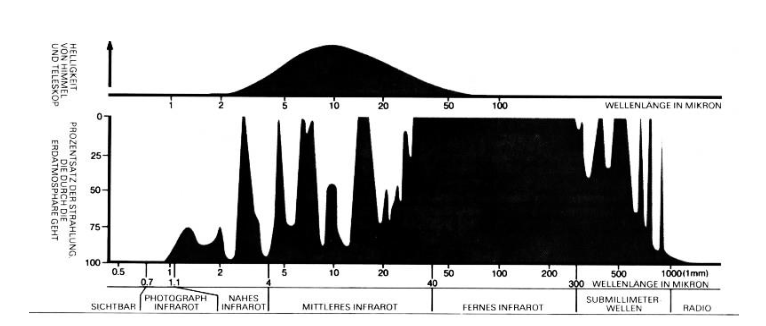

Bei Beobachtungen in diesem Bereich des IR spielt die Athmosphäre eine große Rolle, und ebenso die Emissionen des Teleskops selbst.

### Transmission, Emission 3
$m_{u,\lambda}\,=\,m_{o,\lambda}\,+\,k_\lambda \cdot X$

In [4]:
import math
alpha=50   # Zenithhöhe = 90 - Horizonthöhe

z = alpha/360*2*math.pi
X = 1/math.cos(z)
X_better = 1/math.cos(z)*(1-0.0012*(1/(math.cos(z)**2)-1))
print("X = ",X," genauer X = ",X_better)

mag = 4.2
k = 0.14

korr = k*X
mag_0 = mag - korr

print("Korrekturwert = ",f'{korr:4.2}',"mag. mag_0 = ", f'{mag_0:5.3}'," mag")


X =  1.5557238268604123  genauer X =  1.553072357036057
Korrekturwert =  0.22 mag. mag_0 =   3.98  mag


$m_o \, = \, m_v \, - \, k \, X \, = \, 4,02$. 

Die Magnituden können addiert/subtrahiert werden, weil sie logarithmisch definiert sind, und Multiplikation/Division auf den Ursprüngsgrößen (Lichtströmen) enstricht Addition/Subtraktion auf den logarithmischen Größen (Magnituden)

### Filter 1
Die Transmission durch den Filter entspricht dem Integral über die Tranmission in Abhängigkeit von der Wellenlänge. Das entspricht der Fläche unter der Kurve. Die Fläche eines gleichschenkeligen Dreiecks mit Höhe h und Breite b beträgt $A\,=\,h\,\frac{b}{2}$. Bei Fläche = 1 und h = 1 bedeutet das b = 2. Das FWHM ist aus geometrischen Gründen (Strahlensatz) die Hälfte von b also 1.

Mir ist die Angabe allerdings nicht ganz klar. Wenn ich annehme, dass auf der X-Achse $\lambda$ und auf der Y-Achse Absorption gemeint ist, und weißes Licht mit konstanter Intensität von 350 nm bis 750 nm, dann entspricht so ein Filter einer Reduktion des Flusses um 1/400, also 0.25%. Und der Filter mit halbem FWHM absorbiert entsprechend 0.125%.

Zwei mal der 2. Filter (falls das gemeint ist), entspricht ungefähr dem doppelten Verlust, also wieder 0.25%. Falls zweimal der erste Filter gemeint sein sollte, sind es entsprechend 1%. Genauer müsste man die Tranmissionen multiplizieren, und dann wieder das Komplement auf 1 bilden für die Aggregation der Verluste, aber das Ergebnis ist bei kleinen Werten fast gleich:

In [5]:
R = 1 / 400
T = 1 - R
T_2 = T * T
R_2 = 1 - T_2
print("Kombinierte Verluste aus 2 Filtern = ",f'{R_2:4.2}'," = ",f'{100*R_2:7.2f}',"%")

Kombinierte Verluste aus 2 Filtern =  0.005  =     0.50 %


Das FWHM für die Kombination von 2 Filtern ergibt sich aus der Faltung. In einem Koordinatensystem mit der Spitze des Filters im Punkt (0,1), und Breite = 2 (FWHM = 1), und einem symmetrischen Filterverlauf, betrachten wir nur die positive Seite, die gegeben ist als Y = 1 - x. Faltung entspricht Multiplikation, in dem Fall mit sich selbst, also ergibt das für den Äquivalenfilter y = (1 - x)$^2$. Das FWHM des halben Filters finden wir, wo y = 1/2, also (1 - x)$^2$ = 1/2, x = 1 - $\sqrt{\frac{1}{2}}\,=\,0.293$. Das ist das halbe FWHM, das ganze ist daher 0.586.

### Filter 2
$\frac{\lambda_\Theta}{\lambda_\perp}\, = \, \frac{\sqrt{N^2\,-\,\sin^2 \Theta}}{N}$

$\lambda$(H$\alpha$) = 656,3 nm
N = 1,5

${\lambda_\perp} \, = \, {\lambda_\Theta}\cdot\frac{N}{\sqrt{N^2\,-\,\sin^2 \Theta}}$


In [6]:
l_Ha = 656.3
N = 1.5
Theta_grad = 6

Theta = Theta_grad / 180 * math.pi
l_kipp = l_Ha * N / (N**2 - (np.sin(Theta))**2)**0.5

print("Lambda = ",f'{l_kipp:6.2f}',"nm")

Lambda =  657.90 nm


Der Filter muss für die Wellenlänge 657,90 nm spezifiziert sein

### Filter 3
Das Abschneiden bei 355nm führt dazu, dass Sterne röter erscheinen, als sie tatsächlich sind, weil im Verhältnis mehr Intensität im längerwelligen Spktralbereich ist, als bei ungestörter Beobachtung. Sterne werden also in der Sequenz O-B-A-F-G-K... nach vorne geschoben. Der Effekt betrifft alle Sterne, die unter 355nm einen nennenswerten Anteil im Spektrum haben, also keine ab Klasse M. Schwarzkörperstrahlung wird nicht mehr aussehen, wie Schwarzkörperstrahlung, wenn ein Teil abgeschnitten wird, aber effektiv wird es auch eher einer tieferen Temperatur entsprechen. Das betrifft nur schwarze Strahler mit Temperaturen, wo ein nennenswerter Teil bei unter 350 nm ausgestrahlt wird, das heißt T > 600 K.

### Erdathmosphäre 1
R["] = z$_t$ - z = 60.6" tan z - 0.064 tan$^3$ z

In [7]:
def R(h):
    z_grad = 90 - h # Zenithabstand
    z = z_grad / 180 * np.pi # grad -> rad    
    return( 60.6*np.tan(z) - 0.064*(np.tan(z))**3)

print(R(29))
print(R(35))
print('Stauchung in " bei Bildfeld 6 Grad und Horizonthöhe 32 Grad = ',R(29) - R(35))


108.9495222751826
86.3593461503456
Stauchung in " bei Bildfeld 6 Grad und Horizonthöhe 32 Grad =  22.590176124837


Die Bildfeldvergrößerung beträgt 22,6"

### Erdatmosphäre 2
Öffnungsverhältnis O = D / f. f = D / O = $\frac{3/2}{1/10}$. Daher f = 15m.

Bildgröße d = f$\cdot\Theta$.

$\Theta$ (seeing) = 1" = 1 / 206265 rad

d = 15 / 206265 = 72 $\mu$m, bei 2x-Sampling die Hälfte = 36 $\mu$m.

Speckles: es gilt das Rayleighkriterium. Annahme $\lambda$ = 550 nm, $\alpha$ = 1.22 * $\lambda$ / D = 4,47 10$^{-7}$ rad.

d = 15 * $\alpha$ = 6 $\mu$m bei 2x oversampling die Hälfte, also 3 $\mu$m.

### Erdathmosphäre 3
Verschmiertes Seeingscheibchen s = $\lambda$ / r$_o$ = 1", bei 550 nm ist r$_o$ = 0,11 m. Es gibt N ~ 2,3$\cdot\left(\frac{D}{r_o}\right)^2\,=\,427$ Scheibchen. Auf die teilt sich das Licht auf. 

m$_1$ - m$_2$ = -2,5 log(I$_1$/I$_2$).

-2,5 log (427) = -6,6 mag. 

Die Speckles sind um 6,6 mag weniger hell als der zeitverschmierte Stern.



### Erdathmospäre 4
$\sigma$ = 0.09 D$^{-2/3}$ X$^{1.8}$ e$^{-h/h_o}$ $\Delta$t$^{-0.5}$
Damit die beiden Größen gleich sind, unter gleichen sonstigen Bedingungen, muss man nur die variablen Teile $\Delta$t und D betrachten, und gleichsetzen. Also

$1.5^{-2/3}\cdot t_1^{-0.5} = 0.8^{-2/3} \cdot t_2^{-0.5}$ und erhält nach umformen $t_2=\left(\frac{1.5}{0.8}\right)^{4/3}$, also t$_2$ = 2,3 t$_1$. Um diesen Faktor muss am 80 cm Teleskop länger belichtet werden als am 1,5 m Teleskop um den gleichen Szintillationsfehler zu erreichen.